#How DTFT Works: Loop-form

In [0]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.fftpack

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


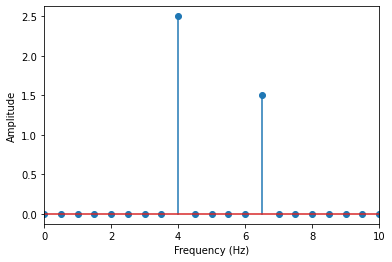

In [28]:
#Create the Signal
srate = 1000 #Hz
time = np.arange(0.0, 2.0, 1/srate) #Time Vector (seconds)
pnts = len(time) #Number of time points 
signal = 2.5*np.sin(2*np.pi*4*time ) + 1.5 * np.sin(2*np.pi*6.5*time)

#Prepare the Fourier Transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs = np.zeros((len(signal)), dtype = complex)

for fi in range (0, pnts):

  csw = np.exp(-1j*2*np.pi*fi*fourTime) #Create Complex Sine Wave

  fCoefs[fi]= np.sum(np.multiply(signal, csw))/pnts #Compute dot product between sine wave & signal.
  #These are called the Fourier Coeeficients

ampls = 2*np.abs(fCoefs) #extract amplitudes

hz = np.linspace(0,srate/2, num = math.floor(pnts/2.0)+1) #Compute frequencies vector 

plt.stem(hz, ampls[range(0, len(hz))])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,10)
plt.show()

#Converting Indices to Frequencies (Hz)

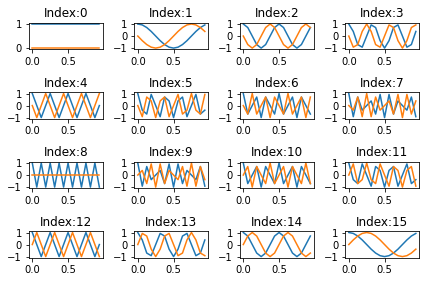

In [29]:
pnts     = 16 # number of time points
fourTime = np.array(range(0,pnts))/pnts #normalized

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # and plot it
    
    loc = np.unravel_index(fi,[4, 4],'F')
    plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.title('Index:{}'.format(fi))
    plt.plot(fourTime,np.real(csw)) #Corresponds to a Cosine
    plt.plot(fourTime,np.imag(csw)) #Corressponds to a Sine
plt.tight_layout(pad=1)
plt.show()

We are visualizing how the real & imaginary part of the Complex Sine Waves is chaning with loop indices.

Index 8 gives the best result because it satisfies Nyquist Frequency (16/2 = 8).
Rest around are ALIASING.

#Short Cut (Programming Trick; Not related to actual Math) for Converting Indices to Frequency(Hz)

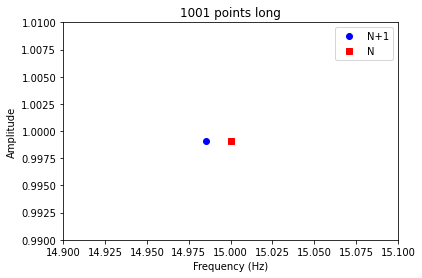

In [30]:
## Case 1: ODD number of data points, N is correct

# create the signal
srate = 1000
time  = np.arange(0,srate+1)/srate
npnts = len(time)

# Notice: A simple 15-Hz sine wave!
signal = np.sin(15*2*np.pi*time)

# its amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

# frequencies vectors
hz1 = np.linspace(0,srate,npnts+1)
hz2 = np.linspace(0,srate,npnts)


# plot it
plt.plot(hz1[:npnts],signalX,'bo',label='N+1')
plt.plot(hz2,signalX,'rs',label='N')
plt.xlim([14.9,15.1])
plt.ylim([.99,1.01])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.title(str(len(time)) + ' points long')
plt.ylabel('Amplitude')
plt.show()

Thus we can see that this method is accurate till Nyquist (15Hz) & not beyond it.

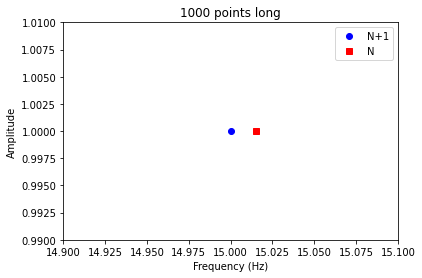

In [31]:
## Case 2: EVEN number of data points, N+1 is correct

# create the signal
srate = 1000
time  = np.arange(0,srate)/srate
npnts = len(time)

# Notice: A simple 15-Hz sine wave!
signal = np.sin(15*2*np.pi*time)

# its amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

# frequencies vectors
hz1 = np.linspace(0,srate,npnts+1)
hz2 = np.linspace(0,srate,npnts)


# plot it
plt.plot(hz1[:npnts],signalX,'bo',label='N+1')
plt.plot(hz2,signalX,'rs',label='N')
plt.xlim([14.9,15.1])
plt.ylim([.99,1.01])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.title(str(len(time)) + ' points long')
plt.ylabel('Amplitude')
plt.show()

Here the Red Point is incorrect, while the blue one is correct. 

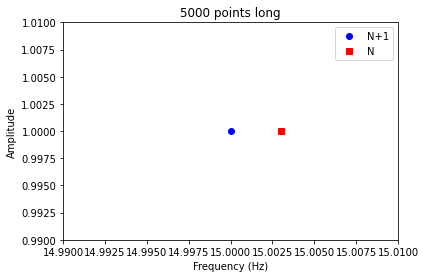

In [32]:
## Case 3: longer signal (5 sec long instead of 1 sec)

# create the signal
srate = 1000
time  = np.arange(0,5*srate)/srate
npnts = len(time)

# Notice: A simple 15-Hz sine wave!
signal = np.sin(15*2*np.pi*time)

# its amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

# frequencies vectors
hz1 = np.linspace(0,srate,npnts+1)
hz2 = np.linspace(0,srate,npnts)


# plot it
plt.plot(hz1[:npnts],signalX,'bo',label='N+1')
plt.plot(hz2,signalX,'rs',label='N')
plt.xlim([14.99,15.01])
plt.ylim([.99,1.01])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.title(str(len(time)) + ' points long')
plt.ylabel('Amplitude')
plt.show()

Again, if we alter the odd & even the corresponding results are matched to above cases.

In [0]:
## Case 4: showing 1/2 of the spectrum (N/2+1 is always correct)

# create the signal
srate = 1000
time  = np.arange(0,srate+1)/srate
npnts = len(time)

# Notice: A simple 15-Hz sine wave!
signal = np.sin(15*2*np.pi*time)

# its amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

# frequencies vectors
hz1 = np.linspace(0,srate/2,np.floor(npnts/2)+1)
hz2 = np.linspace(0,srate/2,np.floor(npnts/2))


# plot it
plt.plot(hz1[:npnts],signalX[:len(hz1)],'bo',label='N+1')
plt.plot(hz2,signalX[:len(hz2)],'rs',label='N')
plt.xlim([14.9,15.1])
plt.ylim([.99,1.01])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.title( '{} points long'.format(len(time)))
plt.ylabel('Amplitude')
plt.show()

Here, (n/2 + 1) issue is corrected whether odd or even. The only difference is that now instead of taking it upto Sampling Rate, we are only taking Sampling Rare/2 . 

Reason for short cut: To code easily & facilitate explorations.

In [0]:
x = np.random.randn(10000,1)
plt.plot( np.linspace(0,srate, len(x), abs(scipy.fftpack.fft(x))))

A Simple one line code to check the results. (Note: The Negative frequencies will be wrongly labelled due to this method.]